## 1D Linear Advection Equation

$${\partial f \over \partial t} + v {\partial f \over \partial x} = 0$$


In [18]:
import numpy as np
import matplotlib.pyplot as plt

### Lax-Wendroff Finite Difference Scheme

In [2]:
def Lax_Wendroff(u_old, u, dx, dt):
    courant_number = u * dt / (2.0 * dx)
    courant_number_squared = 2.0 * courant_number**2
    u_new = u_old.copy() 
    u_new[1:-1] = u_old[1:-1] - courant_number * (u_old[2:] - u_old[:-2]) + \
                 courant_number_squared * (u_old[2:] - 2.0 * u_old[1:-1] + u_old[:-2])
    u_new[0]  = u_old[0] - courant_number * (u_old[1] - u_old[-1]) + \
               courant_number_squared * (u_old[1] - 2.0 * u_old[0] + u_old[-1])
    u_new[-1] = u_old[-1] - courant_number * (u_old[0] - u_old[-1]) + \
               courant_number_squared * (u_old[0] - 2.0 * u_old[-1] + u_old[-2])
    return u_new

### Set Grid and Initial Conditions

In [3]:
######## Set primary quantities : Spatial resolution, start/end points etc ########
N = 100
x_start  = 0.
x_end  = 1.
v = 1.0

######## Set secondary quantities : width of grid cells, grid centre etc ########       
dx = (x_end - x_start) / N 
x_a = x_start + 0.5 * dx
x_b = x_end - 0.5 * dx
xzn = np.linspace(x_a, x_b, N)       
u_initial = np.zeros(N)                   
n_left = 30 * int(N / 100)
x_left = n_left * dx
n_right = 70 * int(N / 100)
u_initial[n_left:n_right] = 1.0           

print("Number of grid points : ", N)
print("Grid Size :", dx)                           

Number of grid points :  100
Grid Size : 0.01



### Integrate 1D advection equation and plot solution

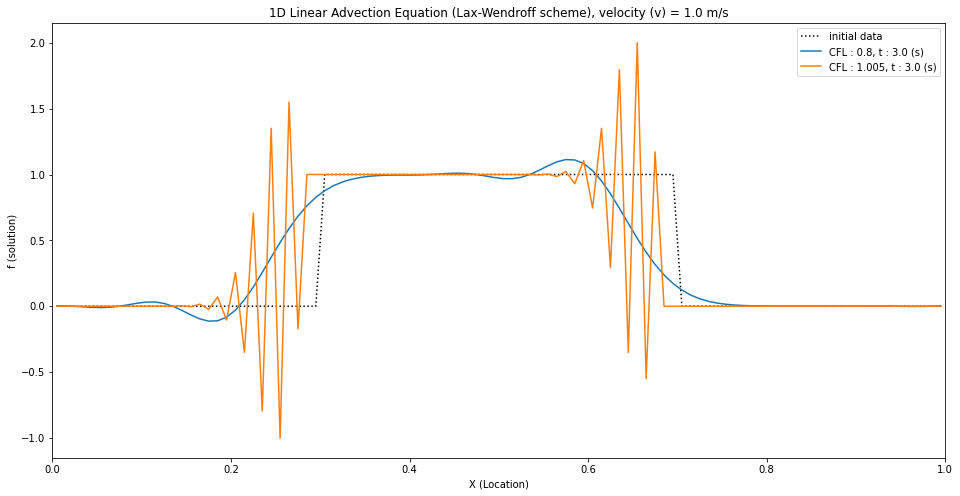

In [17]:
########### CFL Numbers for test ###########

cfl_list = [0.8, 1.005]

########### Plot Initial Condition ###########

plt.figure(figsize=(16,8))
plt.title(f'1D Linear Advection Equation (Lax-Wendroff scheme), velocity (v) = 1.0 m/s')
plt.xlabel(f'X (Location)')
plt.ylabel(f'f (solution)')
plt.xlim(x_start, x_end)
plt.plot(xzn, u_initial,'k:', label="initial data")   # draw initial data as a dotted black curve

########### Run the Finite Difference Scheme ###########
for cfl in cfl_list:
    dt = cfl * (dx / abs(v))           
    u = u_initial.copy()
    num_iterations = int(3 * N / cfl)                         
    for n in range(1, (num_iterations + 1)):                   
        u = Lax_Wendroff(u, v, dx, dt)
        if n == num_iterations:                                
            plt.plot(xzn, u, label=f"CFL : {cfl}, t : {np.ceil(n * dt)} (s)")
            nmax = np.argmax(u)
        plt.legend(loc="upper right")